<a href="https://colab.research.google.com/github/rsmondejar/viu_aprendizaje_supervisado/blob/main/tema2/aprendizaje_supervisado_tema2_metricas_version_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/logo_viu.png?raw=true" align="left" hspace="10px" vspace="0px"></p>

<h1> Asignatura de Inteligencia Artificial</h1>


La presente asignatura hace parte del máster oficial en Inteligencia Artificial, impartido en la Universidad Internacional de Valencia (VIU).

<p><a name="contents"></a></p>

# Contenido

- <a href="#metricas">1. Métricas</a><br>
  - <a href="#metricas_regresion">1.1 Métricas de regresión</a><br>
  - <a href="#metricas_clasificacion">1.2 Métricas de clasificación </a><br>
    - <a href="#tipos_error">1.2.1 Tipos de error</a><br>
    - <a href="#datos_no_balanceados">1.2.2 Datos no balanceados<a><br>
    - <a href="#matriz_de_confusion">1.2.3 Matriz de confusión<a><br>
    - <a href="#todas_las_metricas">1.2.4 Precisión, exhaustividad, exactitud y demás métricas.<a><br>

    


<p><a name="metricas"></a></p>

# 1. Métricas

[Contenidos](#contents)

Antes de iniciar el estudio de los algorítmos de machine learning en aprendizaje supervisado, se debe comprender los tipos de métricas en función del tipo de la variable objetivo $y$ a predecir. En este sentido, existen dos grandes grupos de métricas que se estudian en esta sesión:

* **Métricas para regresión**: en donde la variable objetivo es de tipo númerico y continua, y las métricas tienen como eje común la distancia entre el valor real y el valor predicho: $y_i - \hat{y}_i$
* **Métricas para clasificación:** en donde la variable objetivo es de tipo categórica, y las métricas tienen como eje común un conteo de las clases predichas de forma correcta o incorrecta respecto al total de muestras (o bien por clase, o bien en conjunto).

En cualquier caso, las métricas son puntajes numéricos.

Veamos a continuación cada una de estas métricas.

<p><a name="metricas_regresion"></a></p>

## 1.1 Métricas de regresión

[Contenidos](#contents)

**Regresión lineal simple**

Empecemos por comprender de qué se trata la regresión lineal. Recordemos que la ecuación de un línea recta esta dada por:

$$y = m*x+b$$

donde $y$ es la variable dependiente, $x$ la independiente y a $m$ y $b$ las llamamos pendientes e intercepto.

En el ambito del ML solemos reescribir la ecuación como

$$y=w_0+w_1x$$

siendo $w_0$ y $w_1$ llamados los "parámetros del modelo", en lo que se conoce como **regresión lineal simple**.

El objetivo mediante un conjunto de datos como el que se presenta a continuación, sería el de encontrar los mejores parámetros  $w_0$ y $w_1$ que representan a los datos mediante una recta.

![Imagen tomada de medium.com](https://miro.medium.com/max/642/1*xxxqZtZExBJoxmYKIY-waw.png)

Existen varios algoritmos para resolver ésta tarea, el más simple es usar el algorítmo de mínimos cuadrados.

El algoritmo encuentra los parámetros que minimizan la el error cuadrado conjunto (la suma) entre nuestras predicciones y los valores reales.

![Imagen tomada de /www.jmp.com](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png)

**Regresión lineal múltiple**

A diferencia de la regresión lineal simple, en donde se ajusta una recta a un conjunto de puntos, en la regresión lineal múltiple se ajusta un hiperplano a un conjunto de datos mediante la siguiente ecuación:

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

En la siguiente figura, se ilustra un caso de un ajuste lineal múltiple de un plano representado por dos variables independientes $x_i$ a un conjunto de datos.

![Regresión lineal múltiple](https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/multiple_LR.png?raw=true)


En cualquiera de los casos (regresión lineal simple o múltiple), necesitamos una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. Esta medida de evaluación (función de costo) es el error calculado entre la recta/hiperplano generada/o $\hat{y}$ a los puntos reales. El entrenamiento del modelo será entonces encontrar los valores de $w_i$ que minimicen dicha función de costo.

Entre las métricas más populares encontramos:

* Error medio absoluto (MAE)

$$\text{MAE} = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

* Error absoluto percentual medio (MAPE)

$$\text{MAPE} = \frac{1}{m}\sum_{i=1}^{m} \frac{|\hat{y}_i -y_i|}{\text{max}(\epsilon,|y_i|)}$$


* Error cuadrático medio (MSE)

$$\text{MSE}=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE)

$$\text{RMSE}=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}({\bf x})_i -y_i\right)^2}$$

Estas métricas las podemos obtener del módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn. Apliquémoslas al modelo lineal simple estudiado en la sesión anterior:

### 1.1.2. Ejercicio Guiado

In [8]:
import numpy as np

from math import sqrt

from pprint import pprint

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import matplotlib.pyplot as plt

In [ ]:
# Cargar y explorar los datos
datos = fetch_california_housing()
pprint(datos)
print(np.shape(datos.data))

{'DESCR': '.. _california_housing_dataset:\n'
          '\n'
          'California Housing dataset\n'
          '--------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 20640\n'
          '\n'
          '    :Number of Attributes: 8 numeric, predictive attributes and the '
          'target\n'
          '\n'
          '    :Attribute Information:\n'
          '        - MedInc        median income in block group\n'
          '        - HouseAge      median house age in block group\n'
          '        - AveRooms      average number of rooms per household\n'
          '        - AveBedrms     average number of bedrooms per household\n'
          '        - Population    block group population\n'
          '        - AveOccup      average number of household members\n'
          '        - Latitude      block group latitude\n'
          '        - Longitude     block group longitude\n'
          '\n'
  

In [ ]:
# Extraer la matriz de datos "X" y la variable target "y"
# Cargar 2000 datos
X = datos.data[0:2000]
y = datos.target[0:2000]

In [ ]:
X.shape

(2000, 8)

In [ ]:
# Dividir 0.2 test y fijar semilla aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Max X_train {X_train.max()}, Min X_train {X_train.min()}')

Max X_train 12203.0, Min X_train -124.3


In [ ]:
# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

In [ ]:
print(f'Max X_train {X_train.max()}, Min X_train {X_train.min()}')

Max X_train 28.22632887224849, Min X_train -4.063216731550069


In [ ]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [ ]:
# Definimos un algoritmo SVM de regresión
algorithm = SVR(C=10, gamma='auto',  kernel='rbf')

In [ ]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!!
results = cross_validate(algorithm, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.37299109, 0.29178619, 0.16150689, 0.15791273, 0.15011883]),
 'score_time': array([0.03066587, 0.01616168, 0.0155561 , 0.0157845 , 0.01600218]),
 'test_MAE': array([-0.3014315 , -0.30856187, -0.25088545, -0.29937623, -0.25762049]),
 'test_MAPE': array([-16.06405985, -16.88753023, -14.80495336, -16.20688777,
       -16.15547512]),
 'test_MSE': array([-0.22757075, -0.23324639, -0.15576546, -0.25745249, -0.14779233]),
 'test_RMSE': array([-0.47704376, -0.48295589, -0.39467133, -0.50739776, -0.38443768])}


In [ ]:
# Definimos un algoritmo SVM de regresión candidato
model = SVR(C = 10, gamma = 'auto', kernel = 'rbf')
model = model.fit(X_train, y_train)

In [ ]:
# MAE en el conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test results (MAE) {mae}')

Test results (MAE) 0.25795195819827477


In [ ]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones (y_hat):', np.round(y_pred[0:10],1))
print('Valores reales (y):', np.round(y_test[0:10],1))

Predicciones (y_hat): [1.  1.1 1.5 2.3 1.5 1.4 2.1 1.7 0.9 0.9]
Valores reales (y): [0.8 1.  1.7 2.4 1.5 1.6 1.8 1.1 0.8 1. ]


In [ ]:
# Grafica de realidad -vs- prediccion.
def grafica_real_vs_pred(y_true, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.show()

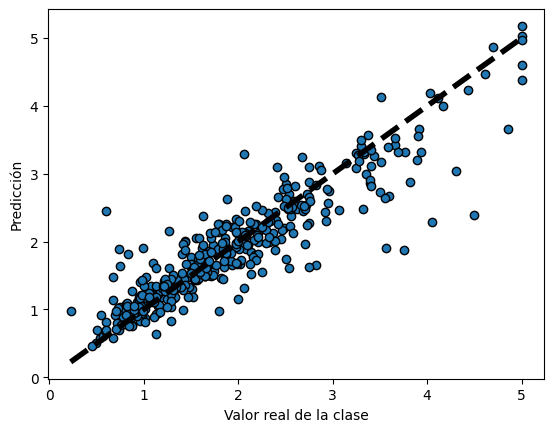

In [ ]:
# Grafica y_pred y_true
grafica_real_vs_pred(y_test, y_pred, metricas, model)

In [ ]:
# Entrenamiento cross_val_score
results = cross_val_score(algorithm, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
pprint(results)

array([-0.3014315 , -0.30856187, -0.25088545, -0.29937623, -0.25762049])


<p><a name="metricas_clasificacion"></a></p>

## 1.2 Métricas de clasificación

[Contenidos](#contents)


Las métricas de clasificación tienen como fin dar un puntaje para la compresión de los modelos en función de su clasificación de las clases.

Empezaremos estudiando las métricas definidas en la **clasificación binaria** en donde solo existen dos clases:

- Clase positiva o clase 1.
- Clase negativa, clase 0, o clase -1.

Las métricas derivadas de la clasificación binaria, pueden extenderse a la clasificación multiclase (donde se tiene más de una clase).

<p><a name="tipos_error"></a></p>

### 1.2.1 Tipos de error

[Contenidos](#contents)



Imaginemos una aplicación para detectar de forma temprana el cáncer mediante una prueba automatizada. Si la prueba es negativa, se supondrá que el paciente está sano, mientras que si la prueba es positiva, el paciente se someterá a una evaluación adicional. Aquí, llamaremos a una prueba positiva (una indicación de cáncer) la clase positiva, y una prueba negativa a la clase negativa. No podemos suponer que nuestro modelo siempre funcionará perfectamente; este cometerá errores. Para cualquier aplicación, debemos preguntarnos cuáles son las consecuencias de estos errores en el mundo real.

Un posible error es que un paciente sano se clasifique como positivo, lo que llevaría a pruebas adicionales. Esto conlleva algunos costos y un inconveniente para el paciente. Una predicción positiva incorrecta se llama **falso positivo**. El otro posible error es que un paciente enfermo se clasifique como negativo, por lo que no recibirá más pruebas ni tratamiento. El cáncer no diagnosticado podría conducir a problemas de salud graves e incluso podría ser fatal. Un error de este tipo (una predicción negativa incorrecta) se llama **falso negativo**.

Por el contrario, existen aquellos casos en en que un algoritmo de ML puede clasificar correctamente las muestras positivas, que se conoce como **True positives**, o las muestras negativas, que se conoce como **True negatives**.Una métrica que resultaría lógica definir a partir de estos conceptos, sería la metrica de exactitud o accuracy:

$$\text{Accuracy} = \frac{TP+TN}{P+N}$$

**Notas**:
- TP + TN --> Casos etiquetas Buenas del modelo
- P + N --> Número total de casos

Por tanto nos darán un valor enter 0 y 1:
- 0 cuando no tengo nada etiquetado bien.
- 1 cuando tengo todo etiquetado correctamente.

------

No obstante, esta métrica puede quedarse corta a la hora de identificar si el modelo es más sensible a la detección de clases positivas o negativas. Para ello, es necesario definir más métricas. Empecémos por ilustrar entonces, en qué caso la métrica de accuracy nos puede dar una percepción incorrecta del desempeño de un algoritmo.


# NOTAS de clase!!!
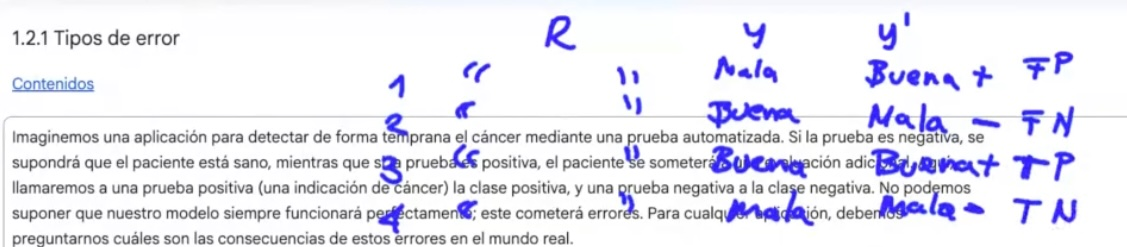

<p><a name="datos_no_balanceados"></a></p>

### 1.2.2 Datos no balanceados

[Contenidos](#contents)



Los conjuntos de datos en los que una clase es mucho más frecuente que la otra a menudo se denominan conjuntos de datos no balanceados. En realidad, los datos no balanceados son la norma, y es raro que los eventos de interés tengan una frecuencia igual o incluso similar en los datos.

Para ilustrar, crearemos un conjunto de datos desequilibrado 9:1 a partir del conjunto de datos [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), clasificando el dígito 9 contra las otras nueve clases:

In [15]:
# Importar librerias
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Cargamos el dataset y separamoslos datos de entrenamiento y la variable objetivo
digits = load_digits()

In [48]:
# Conteo de clases dentro de digits.target
np.unique_counts(digits.target)

UniqueCountsResult(values=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), counts=array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [52]:
# Contar todos los que serían de clase "9"
print("Contar todos los que serían de clase '9':", np.sum(digits.target == 9))

# Contar todos los que no serían de clase "9"
print("Contar todos los que NO serían de clase '9':", np.sum(digits.target != 9))

Contar todos los que serían de clase '9': 180
Contar todos los que NO serían de clase '9': 1617


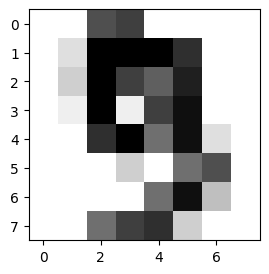

In [42]:
X = digits.data
y = digits.target == 9 # Ejemplo buscando por 9

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#mostramos el dígito 9
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[9], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

digits.target[100] equivaldría a: 4


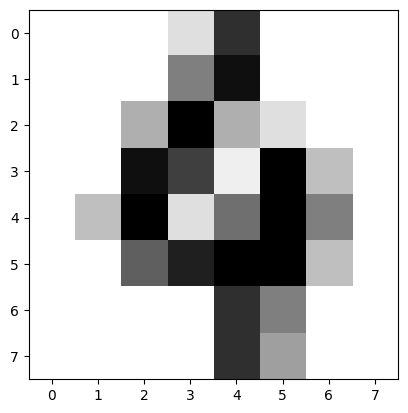

digits.target[200] equivaldría a: 1


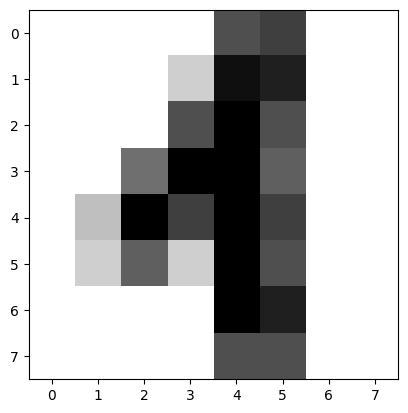

digits.target[300] equivaldría a: 7


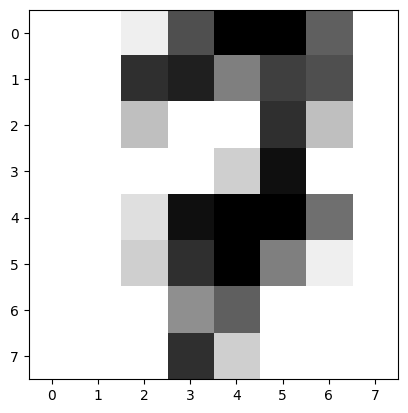

digits.target[500] equivaldría a: 8


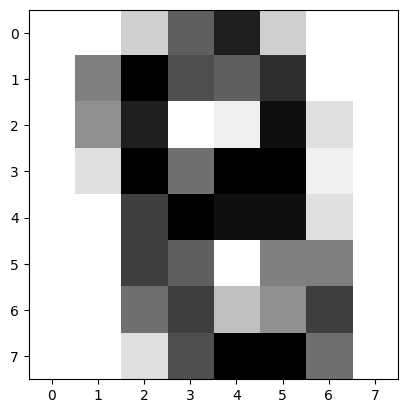

In [28]:
# Ejemplos de diferentes targets y que numeros serían
print("digits.target[100] equivaldría a:", digits.target[100])
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print("digits.target[200] equivaldría a:", digits.target[200])
plt.imshow(digits.images[200], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print("digits.target[300] equivaldría a:", digits.target[300])
plt.imshow(digits.images[300], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print("digits.target[500] equivaldría a:", digits.target[500])
plt.imshow(digits.images[500], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


Podemos usar [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) para predecir siempre la clase mayoritaria ("no nueve") para ver cuál desinformativa puede ser la *accuracy*:

In [53]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Etiqueta predicha única: {}".format(np.unique(pred_most_frequent)))
print("Puntaje: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Etiqueta predicha única: [False]
Puntaje: 0.90


Comparemos esto con el uso de un clasificador real

In [54]:
from sklearn.svm import SVC

svm = SVC(gamma="auto").fit(X_train,y_train)

pred_svm = svm.predict(X_test)

print("Puntaje: {:.2f}".format(svm.score(X_test, y_test)))

Puntaje: 0.90


En ambos casos obtenemos el mismo resultado. Esto podría indicar que algo está mal con la forma en que usamos SVC, o que la accuracy de hecho no es una buena medida. Evaluemos con otro modelo y esta vez, utilicemos el DummyClassifier de manera que produzca una salida aleatoria.

In [55]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Puntaje Dummy: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, solver="liblinear").fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Puntaje LogReg: {:.2f}".format(logreg.score(X_test, y_test)))

Puntaje Dummy: 0.90
Puntaje LogReg: 0.98


El clasificador Dummy es claramente el peor (según la accuracy), mientras que LogisticRegression produce muy buenos resultados. Sin embargo, incluso el clasificador aleatorio produce más del 80% de precisión. Esto hace que sea muy difícil juzgar cuál de estos resultados es realmente útil. El problema aquí es que la accuracy es una medida inadecuada para cuantificar el rendimiento predictivo en este escenario no balanceado, por lo que necesitamos métricas alternativas.

<p><a name="matriz_de_confusion"></a></p>

### 1.2.3 Matriz de confusión

[Contenidos](#contents)

Una de las formas más completas de representar el resultado de evaluar la clasificación binaria es usar matrices de confusión. Inspeccionemos las predicciones de LogisticRegression de la sección anterior usando la función `confusion_matrix`. Ya almacenamos las predicciones sobre el conjunto de prueba en `pred_logreg`:

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


La salida de confusion_matrix es una matriz de dos por dos, donde las filas corresponden a las clases verdaderas y las columnas corresponden a las clases predichas. Cada entrada cuenta con qué frecuencia una muestra que pertenece a la clase correspondiente a la fila (aquí, "no nueve" y "nueve") se clasificó como la clase correspondiente a la columna

In [ ]:
!pip install mglearn;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.0 MB/s eta 0:00:00


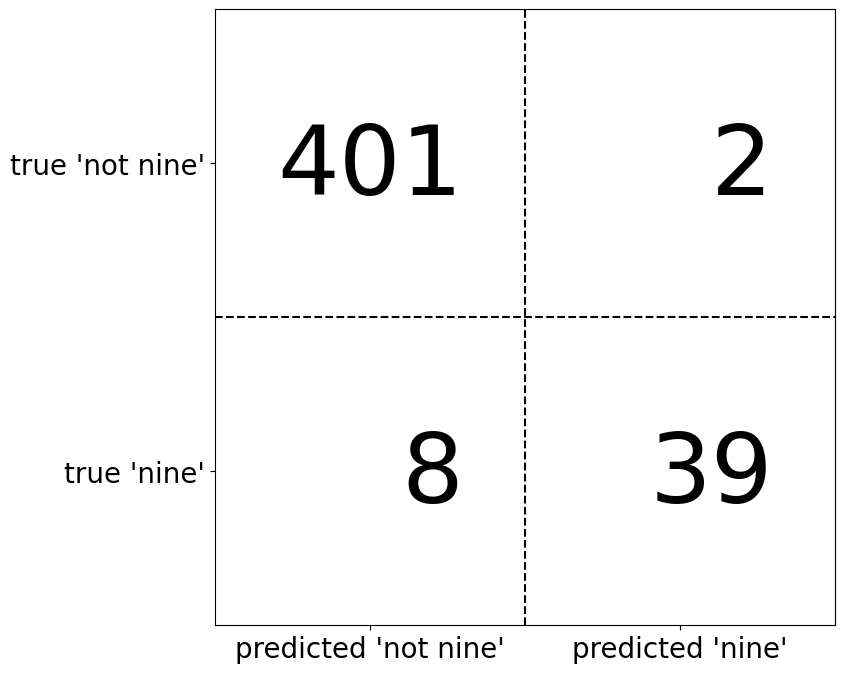

In [ ]:
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

Las entradas en la diagonal principal de la matriz de confusión corresponden a las clasificaciones correctas, mientras que otras entradas nos dicen cuántas muestras de una clase se clasificaron erróneamente como otra clase.

Si declaramos "un nueve" como la clase positiva, podemos relacionar las entradas de la matriz de confusión con los términos falso positivo y falso negativo que presentamos anteriormente. Llamamos a las muestras clasificadas correctamente que pertenecen a los positivos verdaderos de clase positiva y a las muestras clasificadas correctamente que pertenecen a los negativos verdaderos de clase negativa. Estos términos generalmente se abrevian FP, FN, TP y TN y conducen a la siguiente interpretación para la matriz de confusión

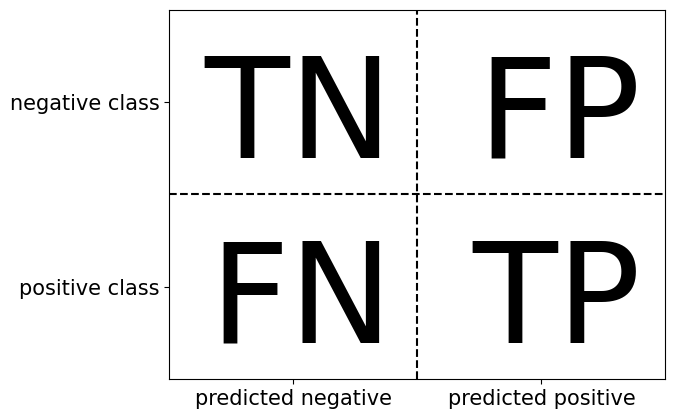

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

Ahora usemos la matriz de confusión para comparar los modelos que ajustamos anteriormente

In [ ]:
print("Clase más frecuente:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nmodelo Dummy:")
print(confusion_matrix(y_test, pred_dummy))
print("\nSVM:")
print(confusion_matrix(y_test, pred_svm))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Clase más frecuente:
[[403   0]
 [ 47   0]]

modelo Dummy:
[[403   0]
 [ 47   0]]

SVM:
[[403   0]
 [ 47   0]]

Logistic Regression
[[401   2]
 [  8  39]]


Mirando la matriz de confusión, es bastante claro que algo está mal con `pred_most_frequent` y `SVM`, porque siempre predicen la misma clase. `pred_dummy`, por otro lado, tiene un número muy pequeño de positivos verdaderos(5), particularmente en comparación con el número de falsos negativos y falsos positivos: hay muchos más falsos negativos que verdaderos negativos. Vemos que solo LR tiene un mejor rendimiento en todos los aspectos: tiene más positivos verdaderos y negativos verdaderos mientras que tiene menos falsos positivos y falsos negativos.

<p><a name="todas_las_metricas"></a></p>

### 1.2.4 Precisión, exhaustividad, exactitud y demás métricas.

[Contenidos](#contents)

Inspeccionar la matriz de confusión total es una tarea dificil, y aunque obtuvimos mucha información al observar todos los aspectos de la matriz, el proceso fue muy manual y cualitativo. Hay varias otras formas de resumir la matriz de confusión, siendo las más comunes la **precisión** y la **exhaustividad**. La precisión mide cuántas de las muestras predichas como positivas son realmente positivas:

$$\text{Precisión} = \frac{TP}{TP + FP}$$

La **precisión** se utiliza como una métrica de rendimiento cuando el objetivo es limitar el número de falsos positivos.

La **exhaustividad**, por otro lado, mide cuántas de las muestras positivas son capturadas por las predicciones positivas:

$$\text{Exhaustividad} = \frac{TP}{TP + FN}$$

La exhaustividad se utiliza como métrica de rendimiento cuando necesitamos identificar todas las muestras positivas; es decir, cuando es importante evitar falsos negativos.

Con frecuencia hay tensión entre precisión y exhaustividad. Esto quiere decir que, al mejorar la precisión, generalmente se reduce la exhaustividad, y viceversa. Por lo tanto, si bien la precisión y la exhaustividad son medidas muy importantes, mirar solo una de ellas no proporcionará una imagen completa del problema. Una forma de resumirlos es el *puntaje f* o la *medida f*, que es la media armónica entre precisión y exhaustividad.

$$f = 2  \frac{\text{Precisión}*\text{Exhaustividad}}{\text{Precisión}+\text{Exhaustividad}}$$

Como tiene en cuenta la precisión y la exhaustividad, puede ser una mejor medida que la *accuracy* en los conjuntos de datos de clasificación binaria no balanceados. Vamos a evaluarlo en las predicciones para el conjunto de datos "nueve vs. resto" que calculamos anteriormente. Aquí, asumiremos que la clase "nueve" es la clase positiva (está etiquetada como Verdadera mientras que el resto está etiquetada como Falsa), por lo que la clase positiva es la clase minoritaria

La **exactitud** mide que tan bien realiza la predicción correcta un clasificador. Este valor corresponde a la razón entre el número de predicciones correctas respecto al número total de predicciones:

\begin{equation}
\text{Accuracy/Exactitud} = \frac{TP+TN}{TP+FP+TN+FN}
\end{equation}

En la siguiente matriz se resumen varias posibles métricas derivadas de la matriz de confusión, ver [enlace](https://en.wikipedia.org/wiki/Confusion_matrix) para mayor información.

![matriz_confusion](https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/matriz_confusion_2_categorias.png?raw=true)

In [ ]:
from sklearn.metrics import f1_score

print("f most_frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f svm: {:.2f}".format(f1_score(y_test, pred_svm)))
print("f LG: {:.2f}".format(f1_score(y_test, pred_logreg)))

f most_frequent: 0.00
f dummy: 0.00
f svm: 0.00
f LG: 0.89


Podemos ver una distinción bastante fuerte entre las predicciones para dummy y para LG, que no estaba tan clara cuando se observaba solo la *accuracy*. Usando el puntaje f para la evaluación, resumimos nuevamente el rendimiento predictivo en un número. Sin embargo, el puntaje f parece capturar nuestra intuición de lo que es un buen modelo mucho mejor que la *accuracy*.

Si queremos un resumen más completo de precisión, exhaustividad y puntaje f, podemos usar la función `clasificación_report` para calcular los tres a la vez

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

La función `clasificación_report` produce una línea por clase (aquí, Verdadero y Falso) e informa precisión, exhaustividad y puntaje f con esta clase como clase positiva. Antes, asumíamos que la clase minoritaria "nueve" era la clase positiva. Si cambiamos la clase positiva a "no nueve", podemos ver a partir del resultado del informe de clasificación que obtenemos una puntuación f de 0,94 con el modelo most_frequent. Además, para la clase "no nueve" tenemos una exhaustividad de 1, ya que clasificamos todas las muestras como "no nueve". La última columna junto al puntaje f proporciona el soporte de cada clase, lo que simplemente significa el número de muestras en esta clase.


In [ ]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

In [ ]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

Como podemos observar al mirar los informes, las diferencias entre los modelos ficticios y un modelo muy bueno ya no son tan claras. Elegir qué clase se declara la clase positiva tiene un gran impacto en las métricas. Mientras que el puntaje f para la clasificación ficticia es 0.09 (vs. 0.89 para la regresión logística) en la clase "nueve", para la clase "no nueve" es 0.90 vs. 0.99, que parecen resultados razonables. Sin embargo, al mirar todos los números juntos obtenemos una imagen bastante precisa de los resultados, y podemos ver claramente la superioridad del modelo de regresión logística